In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 广义线性回归

+ 假设因变量服从高斯分布：$Y={{\theta }^{T}}x+\xi$,其中误差项$\xi \sim N(0,{{\sigma }^{2}})$，那么因变量$Y\sim N({{\theta }^{T}}x,{{\sigma }^{2}})$)

+ 模型预测的输出为$E[Y]$
，根据$E[Y]=E[{{\theta }^{T}}x+\xi ]={{\theta }^{T}}x$，记$\eta ={{\theta }^{T}}x$，则$\eta =E[Y]$

广义线性模型可以认为在以上两点假设做了扩展：

（1）因变量分布不一定是高斯分布，服从一个指数分布族即可(如高斯分布，二项分布，泊松分布，多项分布等等，所以线性回归、逻辑回归实际上都是个广义线性模型)

（2）模型预测输出仍然可以认为是$E[Y$]
（实际上是$E[T(Y)]$，许多情况下$T(Y)=Y）$，但是Y的分布不一定是高斯分布，$E[Y]$和$\eta ={{\theta }^{T}}x$也不一定是简单的相等关系，它们的关系用$\eta =g(E[Y])$描述，称为连接函数，其中$\eta$ 称为自然参数。

由于以上两点的扩展，广义线性模型的应用比基本线性模型广泛许多。对于广义线性这个术语，可以理解为广义体现在因变量的分布形式比较广，只要是一指数分布族即可，而线性则体现在自然参数$\eta ={{\theta }^{T}}x$是$\theta$的线性函数

广义线性模型的应用最广泛的的是逻辑回归和泊松回归。逻辑回归将因变量建模为伯努利分布，输出是二值的，通常用来做二分类。泊松回归将因变量的分布建模为泊松分布，一般用来预测类似顾客数目、一个时间段内给定事件发生数目的问题。


## Logistical Regression 逻辑回归

机器学习中，有两个问题是比较相似的，即预测和分类。通常将模型的输出是有限的离散值的问题称为分类问题，而将模型的输出是连续值的问题称为预测。不同的两个问题自然有不同的解决方法，对于预测问题，通常采用回归分析的方法，比如之前线性回归对于输入样本$x$，模型的输出为$y=h_\theta(x)=\theta^Tx$，这里$y$的取值是连续性的。

那么回归分析一般是用来做预测的，可不可以用来做分类呢？试想一下，我们用线性回归来解决二分类问题，如果其输出y
的取值拿一个阈值$\tau$卡一下，对于输出$y< \tau$的样本分为一类，对于输出$y\ge \tau$的样本分为另一类，这不就好了么？问题是对于线性回归的输出的取值范围是没有大小边界的，那么这个阈值$\tau$怎么取就没法弄了。

与线性回归不同，逻辑回归输出的取值范围是0到1之间，这样的话，选一个阈值$\tau$

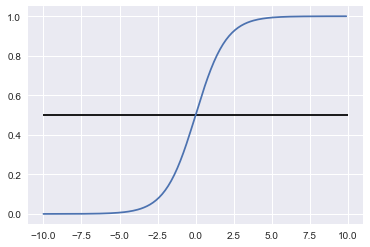

In [13]:
x=np.arange(-10,10,0.1)
y=1/(1+np.exp(-x))
plt.hlines(0.5,-10,10)
plt.plot(x,y)

逻辑回归输出的取值范围是0到1之间，这样的话，选一个阈值$\tau$似乎比较可行了.逻辑函数的定义是这样的$g(z)=\frac{1}{1+{{e}^{-z}}}$，$z\in {{\mathbb{R}}^{1}}$ ，$g(z)\in (0,1)$

y取0.5时对应的自变量取值为0，也就是说，逻辑函数可以将输入分为两类，第一类$z>0$，$g(z)>0.5$，而第二类$z<0$，$g(z)<0.5$

一般情况下，我们的输入x是多维的啊，而逻辑函数的输入是个标量，所以用逻辑函数对我们的多维样本分类首先要对样本进行一个变换$z=\theta^Tx$（注意对样本加入常数项截距，即$z=\theta_1(x_1=1)+\theta_2x_2+...+\theta_nx_n$，对原来n-1为输入增加取值为1的一维，只是为了方便写成向量形式），变换后的逻辑函数:

$${{h}_{\theta }}(x)=g({{\theta }^{T}}x)=\frac{1}{1+{{e}^{-{{\theta }^{T}}x}}}$$

那么现在要对样本分成两类: ${{\theta }^{T}}x>0,{{h}_{\theta }}(x)>0.5$ 一类，${{\theta }^{T}}x<0,{{h}_{\theta }}(x)<0.5$ 一类。而逻辑回归的任务就是根据已有的带类别的样本找到这个$\theta$

### 求解$\theta$

对数似然函数

$$\ell (\theta )=\log \prod\limits_{i=1}^{m}{p({{y}^{(i)}}|{{x}^{(i)}};\theta )}$$

其中m是样本数目，i是样本编号.

$y(i)$的取值只有0和1两个，所以它应当是一个伯努利分布，我们需要确定分别取这两个值的概率。回顾一下上面的$h_\theta(x)$，其取值范围为（0，1），这不正好嘛，$y(i)$取值的概率本身就是0和1之间的么！

$$p(y=1|x,\theta)=h_\theta(x)，p(y=0|x,\theta)=1−h_\theta(x)$$

回顾上面的内容，当$h_\theta(x)$小于0.5时，我们将样本分类为类别0，否则分类为类别1，这样的话取值范围为（0，1）的$h_\theta(x)$是不是可以衡量样本属于类别1的概率呢？结合逻辑回归函数的曲线看，$z=\theta^Tx$比0大的越多，$h_\theta(x)$取值越是偏离阈值0.5而离1越近，这意味这这个样本的分类越不模糊，很明确的属于其中一个类，相反$h_\theta(x)$取值越是偏离阈值0.5而离0越近，样本越是很明确的属于另一个类别。这样的话，样本归为类别1的概率就是$h_\theta(x)$)，归类为类别0的概率就是$1-h_\theta(x)$

$$p({{y}^{(i)}}=1|{{x}^{(i)}},\theta )={{h}_{\theta }}({{x}^{(i)}}),p({{y}^{(i)}}=0|{{x}^{(i)}},\theta )=1-{{h}_{\theta }}({{x}^{(i)}})$$


最终我们可以将似然函数写为

$$\begin{align}\ell (\theta )&=\log \prod\limits_{i=1}^{m}{p({{y}^{(i)}}|{{x}^{(i)}};\theta )} \\ & =\sum\limits_{i=1}^{m}{\log ({{({{h}_{\theta}}({{x}^{(i)}}))}^{{{y}^{(i)}}}}{{(1-{{h}_{\theta }}({{x}^{(i)}}))}^{1-{{y}^{(i)}}}})} \\& =\sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}\log({{h}_{\theta }}({{x}^{(i)}}))+(1-{{y}^{(i)}})\log((1-{{h}_{\theta}}({{x}^{(i)}})) )\right)} \\\end{align}$$

要得到解析解，可以令偏导为0，解一下$\theta_l$，不过解一下就会发现上面的式子不好解。所以为了求解参数，用最优化的方法牛顿法，梯度法之类

$$\begin{align}\frac{\partial \ell (\theta )}{\partial {{\theta }_{l}}}&=\frac{\partial \sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}\log ({{h}_{\theta }}({{x}^{(i)}}))+(1-{{y}^{(i)}})\log((1-{{h}_{\theta }}({{x}^{(i)}}))) \right)}}{\partial {{\theta }_{l}}} \\& =\sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}\frac{1}{{{h}_{\theta }}({{x}^{(i)}})}+(1-{{y}^{(i)}})\frac{1}{1-{{h}_{\theta }}({{x}^{(i)}})} \right)}\frac{\partial {{h}_{\theta }}({{x}^{(i)}})}{\partial {{\theta }_{l}}} \\& =\sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}\frac{1}{{{h}_{\theta }}({{x}^{(i)}})}-(1-{{y}^{(i)}})\frac{1}{1-{{h}_{\theta }}({{x}^{(i)}})} \right)}\frac{\partial g({{\theta }^{T}}{{x}^{(i)}})}{\partial {{\theta }_{l}}} \\& =\sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}\frac{1}{{{h}_{\theta }}({{x}^{(i)}})}-(1-{{y}^{(i)}})\frac{1}{1-{{h}_{\theta }}({{x}^{(i)}})} \right)}g({{\theta }^{T}}{{x}^{(i)}})(1-g({{\theta }^{T}}{{x}^{(i)}}))\frac{\partial {{\theta }^{T}}{{x}^{(i)}}}{\partial {{\theta }_{l}}} \\ & =\sum\limits_{i=1}^{m}{\left( {{y}^{(i)}}(1-g({{\theta }^{T}}{{x}^{(i)}})-(1-{{y}^{(i)}})g({{\theta }^{T}}{{x}^{(i)}}) \right)}x_{l}^{(i)} \\& =\sum\limits_{i=1}^{m}{({{y}^{(i)}}-}g({{\theta }^{T}}{{x}^{(i)}}))x_{l}^{(i)} \\\end{align}$$


### 逻辑回归如何理解

回顾似然函数$\ell (\theta ) = \log \prod\limits_{i = 1}^m {p({y^{(i)}}|{x^i},\theta )}$，我们的目标要最大化这个东西，也就是要最大化连乘符号里面的每一项$p({{y}^{(i)}}|{{x}^{(i)}},\theta )={{({{h}_{\theta }}({{x}^{(i)}}))}^{{{y}^{(i)}}}}{{(1-{{h}_{\theta }}({{x}^{(i)}}))}^{1-{{y}^{(i)}}}}$，它怎么才能大呢？考虑单个样本x如果它对应类别y=1，那么$p(y|x,\theta)=h_\theta(x)$，所以$h_\theta(x)$要比较大才好，而${{h}_{\theta }}(x)=g({{\theta }^{T}}x)=\frac{1}{1+{{e}^{-{{\theta }^{T}}x}}}$，所以$\theta^Tx$要大于0比较好（结合逻辑函数曲线看看）；相反如果y=0，最大化似然函数则要求$\theta^Tx$尽可能小于零。

所以最大化似然函数的解就是找到一个$\theta$，是得对于类别为1的样本，尽可能满足$\theta^Tx>0$，而对于类别为0的样本，尽可能满足$\theta^Tx<0$。换句话说，我们找到的超平面$\theta^Tx=0$用来对样本分类。